##### Get all the csvs in the directory and get the last one (most recent) and calculat the max and mean results

In [13]:
# Get the list of csv's
import glob
import csv
files = glob.glob("/home/arthur/CLionProjects/GeneticAlgorithm/results/*.csv")

# Get the values for the latest run
totalMaxes = []
totalMeans = []

for i in range(0, 99):
    totalMaxes.append(0)
    totalMeans.append(0)
    
numFiles = len(files)

config = []

for file in files:
    with open(files[-1], newline='') as csvfile:
        maxes = []
        means = []
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for idx, row in enumerate(spamreader):
            if idx == 0:
                config = row[0].split(',')
                continue
            row = row[0].split(',')    
            maxes.append(row[0])
            means.append(row[1])
        for idx, amount in enumerate(maxes):
            totalMaxes[idx] += int(amount)
        for idx, amount in enumerate(means):
            totalMeans[idx] += int(amount)

avgMaxes = []
avgMeans = []
for amount in totalMaxes:
    avgMaxes.append(float(amount) / float(numFiles))
for amount in totalMeans:
    avgMeans.append(float(amount) / float(numFiles))


##### Plot the results

Parameters of GA:
Number of generations: 100
Number of chromosones: 42
Size of population: 100
Probability of crossover: 100
Probability of mutation: 1433


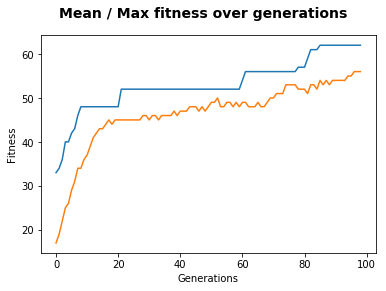

In [14]:
print('Parameters of GA:')
print('Number of generations: %s' % config[0])
print('Number of chromosones: %s' % config[1])
print('Size of population: %s' % config[2])
print('Probability of crossover: %s' % config[3])
print('Probability of mutation: %s' % config[4])

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.suptitle('Mean / Max fitness over generations', fontsize=14, fontweight='bold')
plt.plot(range(0, len(avgMaxes)), avgMaxes)
plt.plot(range(0, len(avgMeans)), avgMeans)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.show()
fig.savefig('/home/arthur/charts/chart.png')